In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
X=df.iloc[:,:-1]

In [5]:
y=df.iloc[:,-1]

In [9]:
import xgboost
regressor=xgboost.XGBRegressor()

In [10]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [11]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [14]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

In [16]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [17]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
predictions=regressor.predict(X_test)

In [24]:
predictions

array([427.8384 , 432.24237, 444.27228, 483.9921 , 445.1004 , 466.9469 ,
       467.1231 , 431.0614 , 429.93103, 473.3476 , 454.8006 , 442.36188,
       430.4814 , 439.0784 , 467.44037, 437.51154, 442.84338, 461.09616,
       464.96808, 466.84854, 434.93152, 465.47937, 463.02383, 456.642  ,
       429.50415, 456.22824, 475.18597, 434.60675, 456.44415, 461.28226,
       439.36642, 446.1479 , 435.6666 , 441.51663, 437.65872, 484.0768 ,
       461.63675, 488.1228 , 440.89517, 444.83875, 465.88522, 464.03738,
       474.07034, 476.89536, 482.8664 , 451.93237, 432.58926, 448.48953,
       447.84296, 447.0155 , 467.39258, 452.96606, 442.8618 , 438.39932,
       466.62878, 463.22546, 437.4915 , 451.10867, 476.3772 , 477.581  ,
       437.9328 , 433.5493 , 460.9508 , 440.0281 , 432.0586 , 456.3395 ,
       444.58722, 475.19452, 467.69455, 431.8826 , 443.99448, 453.32336,
       483.90933, 481.8618 , 433.15427, 453.59155, 477.79932, 479.0568 ,
       434.4367 , 446.70352], dtype=float32)

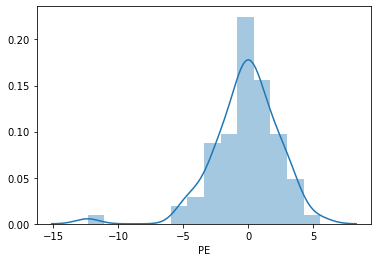

In [26]:
import seaborn as sns
sns.distplot(y_test-predictions)

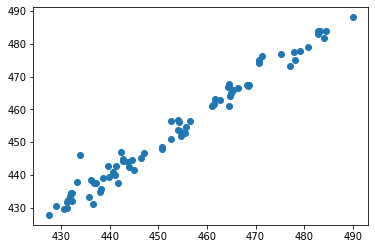

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [29]:
from sklearn import metrics

In [31]:
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.838464721679685
MSE: 6.606525930011912
RMSE: 2.5703163093308015


In [32]:
errors = abs(predictions - y_test)

In [33]:
#mape=mean absolute percentage error
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Accuracy: 99.5924 %.


In [34]:
df=pd.read_csv('Test.csv')

In [35]:
y_pred=regressor.predict(df)

In [40]:
t=y_pred[1000:1568]

In [41]:
from array import *
list1=t.tolist()
list1

[441.9549865722656,
 469.69488525390625,
 441.2725524902344,
 443.4864807128906,
 480.92919921875,
 438.4297180175781,
 436.14239501953125,
 469.6304016113281,
 436.1054992675781,
 446.9373779296875,
 448.6961669921875,
 444.22210693359375,
 431.4864807128906,
 461.7339172363281,
 436.82049560546875,
 441.2994384765625,
 447.6611633300781,
 460.9621276855469,
 461.1173400878906,
 436.9198303222656,
 472.1515808105469,
 479.018310546875,
 432.6003112792969,
 444.39739990234375,
 440.4348449707031,
 454.7785949707031,
 477.6672668457031,
 447.5572204589844,
 446.05767822265625,
 431.41217041015625,
 453.5091247558594,
 479.673828125,
 440.6551208496094,
 434.61712646484375,
 458.66595458984375,
 442.4317932128906,
 451.9743957519531,
 453.797607421875,
 470.4364929199219,
 432.3110656738281,
 474.3523254394531,
 475.6544189453125,
 444.2186584472656,
 442.58123779296875,
 468.788818359375,
 463.3926696777344,
 471.091064453125,
 431.44757080078125,
 436.7708435058594,
 432.0087585449219,